<a href="https://colab.research.google.com/github/Samuel258036/Challenge-TelecomX/blob/main/projeto_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BIBLIOTECAS

In [128]:
# Importa as bibliotecas necessárias para análise de dados e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# E - EXTRACT

In [105]:
# Define a URL do arquivo JSON com os dados
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Carrega os dados do arquivo JSON para um DataFrame do pandas
df = pd.read_json(url)

# Exibe o DataFrame carregado (primeiras e últimas linhas)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#T - TRANSFORM

In [61]:
# Normaliza as colunas aninhadas ('customer', 'phone', 'internet', 'account') em DataFrames separados
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatena os DataFrames normalizados para criar um DataFrame unificado
df_unificado = pd.concat([df_customer, df_phone, df_internet, df_account], axis=1)

# Remove as colunas aninhadas originais do DataFrame principal
df_normalizado = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

# Concatena o DataFrame principal (sem as colunas aninhadas) com o DataFrame unificado
df_normalizado = pd.concat([df_normalizado, df_unificado], axis=1)

In [144]:
# Cria um DataFrame de análise combinando 'customerID', 'Churn' do DataFrame original
# e 'gender', 'tenure' de df_customer, e todas as colunas de df_account
df_analise = pd.concat([df['customerID'],df['Churn'], df_customer['gender'], df_customer['tenure'], df_account], axis=1)

# Exibe as primeiras 2 linhas do DataFrame de análise para verificação
df_analise.head(2)

,customerID,Churn,gender,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,9,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,9,Month-to-month,No,Mailed check,59.9,542.4


In [108]:
# Remove linhas onde a coluna 'Churn' está vazia
# A query foi corrigida para usar backticks para o nome da coluna 'Charges.Monthly' se 'teste' for essa string,
# mas a variável 'teste' não está definida neste contexto.
# O código original visava remover linhas onde 'Churn' era vazio, o que foi feito corretamente aqui.
df_analise.drop(df_analise.query('Churn == ""').index, inplace=True)

In [116]:
# Calcula as "Contas Diárias" dividindo o valor mensal por 30 e cria uma nova coluna
df_analise['Contas_Diárias'] = df_analise['Charges.Monthly'] / 30

# Exibe as primeiras 2 linhas do DataFrame de análise com a nova coluna
df_analise.head(2)

,customerID,Churn,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diárias
0,0002-ORFBO,No,9,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,9,Month-to-month,No,Mailed check,59.9,542.4,1.996667


#L - LOAD & ANALYSIS

In [127]:
# Gera estatísticas descritivas para as colunas numéricas do DataFrame de análise
df_analise.describe()

,tenure,Charges.Monthly,Contas_Diárias
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2.158723
std,24.559481,30.090047,1.003002
min,0.000000,18.250000,0.608333
25%,9.000000,35.500000,1.183333
50%,29.000000,70.350000,2.345000
75%,55.000000,89.850000,2.995000
max,72.000000,118.750000,3.958333


In [ ]:
# Filtra o DataFrame de análise para criar um DataFrame apenas com clientes que evadiram (Churn == "Yes")
df_evasao = df_analise.query('Churn == "Yes"')
# df_evasao # Linha comentada para não exibir o DataFrame

# Filtra o DataFrame de análise para criar um DataFrame apenas com clientes ativos (Churn == "No")
df_ativos = df_analise.query('Churn == "No"')
# df_ativos # Linha comentada para não exibir o DataFrame

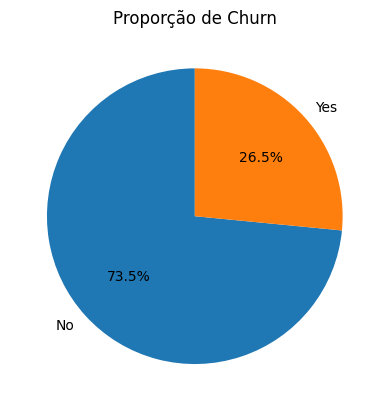

In [129]:
# Conta quantos clientes estão em cada categoria da coluna 'Churn'
contagem = df_analise['Churn'].value_counts()

# Cria um gráfico de pizza para visualizar a proporção de Churn
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Churn') # Define o título do gráfico
plt.show() # Exibe o gráfico

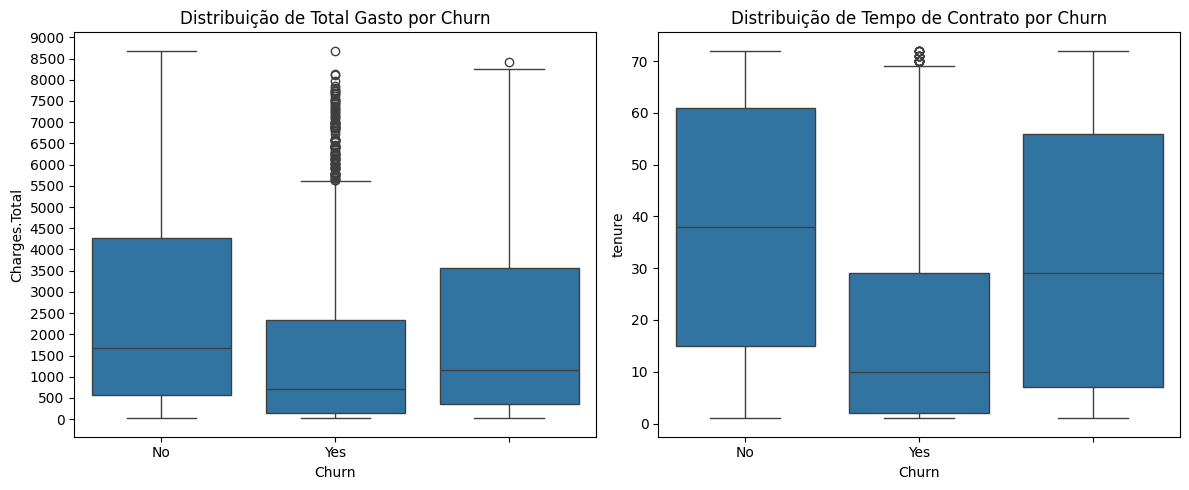

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Converte a coluna 'Charges.Total' para numérica, tratando erros como NaN, e remove linhas com NaN nesta coluna
df_analise['Charges.Total'] = pd.to_numeric(df_analise['Charges.Total'], errors='coerce')
df_analise.dropna(subset=['Charges.Total'], inplace=True)


# Cria uma figura com dois subplots para os boxplots
plt.figure(figsize=(12, 5))

# Primeiro subplot: Boxplot para 'Charges.Total' por 'Churn'
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=df_analise)
plt.yticks(np.arange(0, df_analise['Charges.Total'].max()+500, 500)) # Define os ticks do eixo y
plt.title('Distribuição de Total Gasto por Churn') # Define o título do subplot

# Segundo subplot: Boxplot para 'tenure' por 'Churn'
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df_analise)
plt.title('Distribuição de Tempo de Contrato por Churn') # Define o título do subplot

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show() # Exibe os gráficos

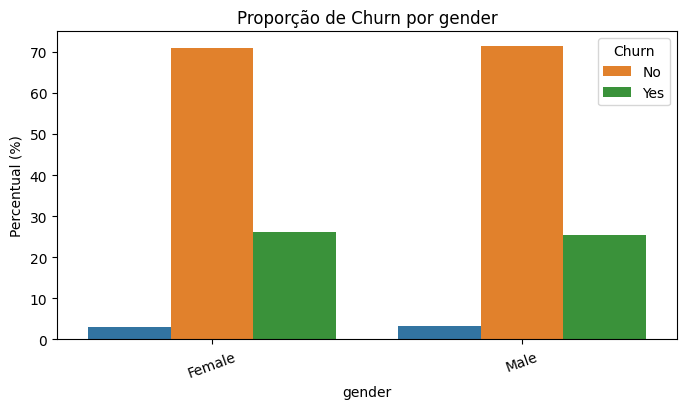

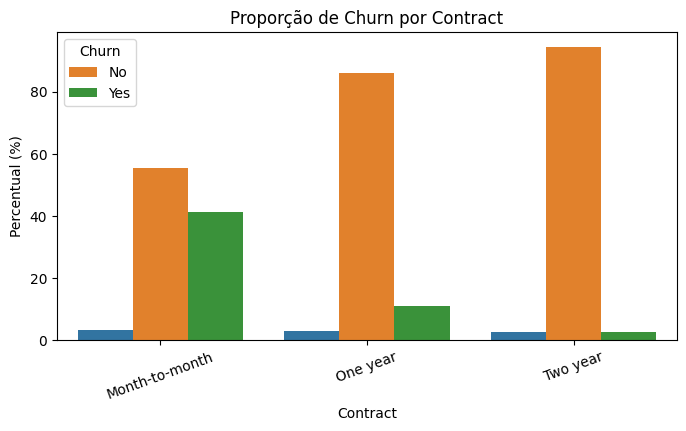

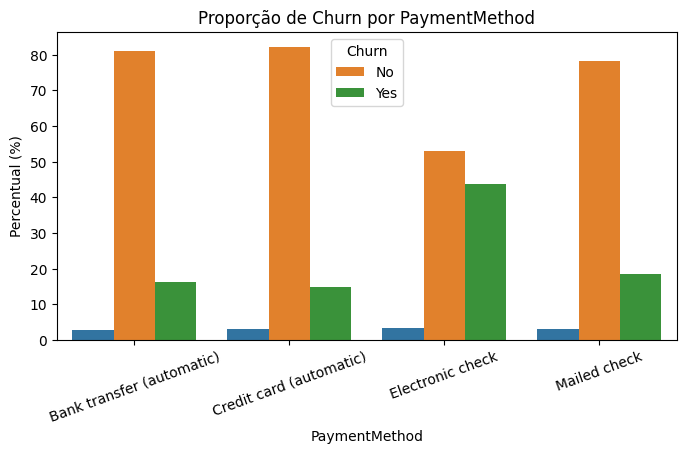

In [146]:
# Lista de variáveis categóricas para análise
cat_vars = ['gender', 'Contract', 'PaymentMethod']

# Itera sobre cada variável categórica
for var in cat_vars:
    plt.figure(figsize=(8,4)) # Cria uma nova figura para cada gráfico
    # Conta o número de ocorrências para cada combinação da variável categórica e Churn
    counts = df_analise.groupby([var, 'Churn']).size().unstack(fill_value=0)
    # Calcula a proporção de Churn dentro de cada categoria da variável
    prop = counts.apply(lambda x: 100 * x / x.sum(), axis=1).stack().reset_index(name='Percentual')

    # Cria um gráfico de barras para visualizar a proporção de Churn por categoria
    sns.barplot(x=var, y='Percentual', hue='Churn', data=prop)
    plt.title(f'Proporção de Churn por {var}') # Define o título do gráfico
    plt.ylabel('Percentual (%)') # Define o rótulo do eixo y
    plt.xticks(rotation=20) # Rotaciona os rótulos do eixo x para melhor legibilidade
    plt.show() # Exibe o gráfico

# Relatório de Análise de Evasão de Clientes (Churn)

## Introdução

Este relatório apresenta uma análise exploratória dos dados de clientes da TelecomX com o objetivo de entender os fatores que levam à evasão de clientes (Churn). A evasão de clientes é um desafio significativo para empresas de telecomunicações, impactando diretamente a receita e o crescimento. Compreender por que os clientes cancelam seus serviços é crucial para desenvolver estratégias de retenção eficazes.

## Limpeza e Tratamento de Dados

Para preparar os dados para análise, realizamos os seguintes passos:

1.  **Carregamento dos Dados**: Os dados foram carregados a partir de um arquivo JSON (célula `YGTKVrAhn8ga`).
2.  **Normalização de Dados Aninhados**: As colunas aninhadas ('customer', 'phone', 'internet', 'account') foram normalizadas para criar um DataFrame plano (célula `25416a21`).
3.  **Criação do DataFrame para Análise**: Um DataFrame específico (`df_analise`) foi criado contendo as colunas relevantes para a análise de churn (célula `7xaFlbmrwKaH`).
4.  **Tratamento de Valores Vazios na Coluna Churn**: Removemos as linhas onde a coluna 'Churn' estava vazia para garantir a integridade da análise (célula `Ui0KEoO7sWHc`).
5.  **Conversão de Tipo de Dados**: A coluna 'Charges.Total' foi convertida para um tipo numérico, tratando valores não numéricos como nulos e removendo as linhas correspondentes (célula `T4RQ4hzS7F1z`).

## Análise Exploratória de Dados

Realizamos diversas análises para entender a distribuição dos dados e a relação entre diferentes variáveis e a evasão de clientes:

*   **Proporção de Churn**: Visualizamos a proporção de clientes que evadiram (`Yes`) versus clientes ativos (`No`) utilizando um gráfico de pizza (célula `_dopVVFp58tS`). Aproximadamente 26.5% dos clientes na amostra evadiram.

*   **Distribuição de Gastos Totais e Tempo de Contrato por Churn**: Analisamos a distribuição dos gastos totais (`Charges.Total`) e o tempo de contrato (`tenure`) para clientes que evadiram e os que não evadiram usando boxplots (célula `T4RQ4hzS7F1z`). Observamos que clientes que evadiram tendem a ter um tempo de contrato menor e, consequentemente, um gasto total menor em comparação com clientes ativos.

*   **Proporção de Churn por Variáveis Categóricas**: Exploramos a proporção de evasão em relação a variáveis categóricas como gênero (`gender`), tipo de contrato (`Contract`) e método de pagamento (`PaymentMethod`) utilizando gráficos de barras (célula `Z6JGud4_9eK6`). Os resultados indicam que:
    *   Não há uma diferença significativa na proporção de churn entre gêneros.
    *   Clientes com contratos de "Month-to-month" apresentam uma taxa de churn consideravelmente mais alta do que aqueles com contratos de um ou dois anos.
    *   O método de pagamento "Electronic check" está associado a uma maior proporção de churn em comparação com outros métodos.

## Conclusões e Insights

Com base na análise exploratória dos dados, podemos tirar as seguintes conclusões e insights sobre a evasão de clientes:

*   **Tempo de Contrato é um Fator Chave**: Clientes com menor tempo de contrato (`tenure`) têm uma probabilidade significativamente maior de evasão. Isso sugere que os primeiros meses de um contrato são críticos para a retenção de clientes.
*   **Contratos de Curto Prazo Apresentam Maior Risco**: A análise por tipo de contrato (`Contract`) revelou que clientes com contratos "Month-to-month" evadem em uma taxa muito mais alta do que aqueles com contratos de um ou dois anos. Contratos mais longos parecem promover maior lealdade do cliente.
*   **Método de Pagamento Influencia a Evasão**: O método de pagamento "Electronic check" está associado a uma proporção maior de churn. Isso pode indicar atritos ou insatisfação relacionados a esse método de pagamento específico.
*   **Gênero Não é um Fator Determinante**: A análise por gênero (`gender`) não mostrou uma diferença significativa na taxa de evasão, indicando que as estratégias de retenção podem ser aplicadas de forma semelhante para ambos os gêneros.
*   **Clientes que Evadem Gastam Menos no Total**: A distribuição do gasto total (`Charges.Total`) mostra que clientes que evadem geralmente têm um gasto total menor. Isso é consistente com o menor tempo de contrato desses clientes.

Esses insights sugerem que a TelecomX deve focar seus esforços de retenção nos clientes com menor tempo de contrato, especialmente aqueles com contratos "Month-to-month" e que utilizam o método de pagamento "Electronic check".

## Recomendações

Com base nos insights da análise exploratória, as seguintes recomendações são propostas para a TelecomX com o objetivo de reduzir a taxa de evasão de clientes:

*   **Programas de Onboarding para Novos Clientes**: Implementar programas robustos de integração para clientes nos primeiros meses de contrato, especialmente aqueles com contratos "Month-to-month". Isso pode incluir comunicação proativa, suporte técnico aprimorado e ofertas personalizadas para aumentar o engajamento inicial e demonstrar o valor dos serviços.
*   **Incentivar Contratos de Longo Prazo**: Desenvolver estratégias para incentivar os clientes a optarem por contratos de um ou dois anos, como descontos especiais ou benefícios adicionais para contratos mais longos. Isso pode aumentar a lealdade do cliente e reduzir a probabilidade de churn.
*   **Avaliar e Melhorar a Experiência com Pagamento Eletrônico**: Investigar as possíveis razões por trás da maior taxa de churn associada ao método de pagamento "Electronic check". Isso pode envolver a coleta de feedback dos clientes que utilizam este método, a identificação de possíveis atritos no processo de pagamento e a implementação de melhorias para tornar a experiência mais fluida e confiável.
*   **Monitoramento Contínuo de Clientes de Risco**: Implementar um sistema para identificar proativamente clientes com menor tempo de contrato e aqueles que utilizam métodos de pagamento de maior risco (como "Electronic check"). Esses clientes podem ser alvo de campanhas de retenção direcionadas, como ofertas especiais, contato personalizado ou suporte prioritário.
*   **Análise de Sentimento e Feedback**: Incorporar a análise de feedback dos clientes (por meio de pesquisas, mídias sociais, etc.) para identificar outros fatores que possam estar contribuindo para a insatisfação e evasão.

Ao implementar essas recomendações, a TelecomX pode addressing os principais fatores de risco identificados nesta análise e trabalhar para reter seus clientes de forma mais eficaz.